In [1]:
#import neccessary libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px

In [2]:
init_notebook_mode(connected=True)

In [3]:
#read the casualty file
cas = pd.read_csv('Cas.csv')

In [4]:
cas.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2016010000005,2,1,1,1,23,5,3,0,0,0,0,0,2,1,4
1,2016010000006,1,1,1,2,36,7,3,0,0,0,0,0,9,1,10
2,2016010000008,1,1,1,1,24,5,3,0,0,0,0,0,9,1,8
3,2016010000016,1,1,2,2,59,9,3,0,0,0,3,0,11,1,4
4,2016010000018,2,1,1,1,28,6,3,0,0,0,0,0,1,1,6


In [5]:
cas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181384 entries, 0 to 181383
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Accident_Index                      181384 non-null  object
 1   Vehicle_Reference                   181384 non-null  int64 
 2   Casualty_Reference                  181384 non-null  int64 
 3   Casualty_Class                      181384 non-null  int64 
 4   Sex_of_Casualty                     181384 non-null  int64 
 5   Age_of_Casualty                     181384 non-null  int64 
 6   Age_Band_of_Casualty                181384 non-null  int64 
 7   Casualty_Severity                   181384 non-null  int64 
 8   Pedestrian_Location                 181384 non-null  int64 
 9   Pedestrian_Movement                 181384 non-null  int64 
 10  Car_Passenger                       181384 non-null  int64 
 11  Bus_or_Coach_Passenger              181

In [6]:
#check for duplicates
cas.duplicated().sum()

0

In [7]:
#cas.columns

In [8]:
#check irrelevant values(-1)
new = cas[cas[['Vehicle_Reference', 'Casualty_Reference',
       'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',
       'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type',
       'Casualty_Home_Area_Type', 'Casualty_IMD_Decile']] < 0]
new.sum()

Accident_Index                            0.0
Vehicle_Reference                         0.0
Casualty_Reference                        0.0
Casualty_Class                            0.0
Sex_of_Casualty                         -52.0
Age_of_Casualty                       -2846.0
Age_Band_of_Casualty                  -2846.0
Casualty_Severity                         0.0
Pedestrian_Location                      -5.0
Pedestrian_Movement                     -14.0
Car_Passenger                          -475.0
Bus_or_Coach_Passenger                  -38.0
Pedestrian_Road_Maintenance_Worker     -156.0
Casualty_Type                             0.0
Casualty_Home_Area_Type              -21597.0
Casualty_IMD_Decile                  -37458.0
dtype: float64

In [9]:
#Remove irrelevant values
cas = cas[(cas[['Vehicle_Reference', 'Casualty_Reference',
       'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',
       'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type',
       'Casualty_Home_Area_Type', 'Casualty_IMD_Decile']] != -1).all(axis=1)]
cas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141872 entries, 0 to 181381
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Accident_Index                      141872 non-null  object
 1   Vehicle_Reference                   141872 non-null  int64 
 2   Casualty_Reference                  141872 non-null  int64 
 3   Casualty_Class                      141872 non-null  int64 
 4   Sex_of_Casualty                     141872 non-null  int64 
 5   Age_of_Casualty                     141872 non-null  int64 
 6   Age_Band_of_Casualty                141872 non-null  int64 
 7   Casualty_Severity                   141872 non-null  int64 
 8   Pedestrian_Location                 141872 non-null  int64 
 9   Pedestrian_Movement                 141872 non-null  int64 
 10  Car_Passenger                       141872 non-null  int64 
 11  Bus_or_Coach_Passenger              141

In [10]:
#check for missing values
cas.isnull().sum()

Accident_Index                        0
Vehicle_Reference                     0
Casualty_Reference                    0
Casualty_Class                        0
Sex_of_Casualty                       0
Age_of_Casualty                       0
Age_Band_of_Casualty                  0
Casualty_Severity                     0
Pedestrian_Location                   0
Pedestrian_Movement                   0
Car_Passenger                         0
Bus_or_Coach_Passenger                0
Pedestrian_Road_Maintenance_Worker    0
Casualty_Type                         0
Casualty_Home_Area_Type               0
Casualty_IMD_Decile                   0
dtype: int64

In [11]:
#Read accident file
dftRoadSafety_Accidents = pd.read_csv('dftRoadSafety_Accidents_2016.csv')
dftRoadSafety_Accidents.head()

C:\Users\Alex\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning:

Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.



,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2016010000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,1,01/11/2016,...,0,0,5,1,1,0,0,1,1,E01000543
1,2016010000006,551920.0,174560.0,0.184928,51.449595,1,3,1,1,01/11/2016,...,0,0,4,1,1,0,0,1,1,E01000375
2,2016010000008,505930.0,183850.0,-0.473837,51.543563,1,3,1,1,01/11/2016,...,0,0,4,1,1,0,0,1,1,E01033725
3,2016010000016,527770.0,168930.0,-0.164442,51.404958,1,3,1,1,01/11/2016,...,0,0,1,1,1,0,0,1,1,E01003379
4,2016010000018,510740.0,177230.0,-0.406580,51.483139,1,3,2,1,01/11/2016,...,0,0,1,1,1,0,0,1,1,E01002583


In [41]:
#dftRoadSafety_Accidents['Date']

In [13]:
dftRoadSafety_Accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136621 entries, 0 to 136620
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               136621 non-null  object 
 1   Location_Easting_OSGR                        136614 non-null  float64
 2   Location_Northing_OSGR                       136614 non-null  float64
 3   Longitude                                    136614 non-null  float64
 4   Latitude                                     136614 non-null  float64
 5   Police_Force                                 136621 non-null  int64  
 6   Accident_Severity                            136621 non-null  int64  
 7   Number_of_Vehicles                           136621 non-null  int64  
 8   Number_of_Casualties                         136621 non-null  int64  
 9   Date                                         136621 non-nul

In [14]:
#check for duplicates
dftRoadSafety_Accidents.duplicated().sum()

0

In [15]:
#dftRoadSafety_Accidents.columns

In [16]:
#check for irrelevant values
new1 = dftRoadSafety_Accidents[dftRoadSafety_Accidents[[ 
        'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week',
        'Local_Authority_(District)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident'
      ]] < 0]
new1.sum()

Accident_Index                                     0.0
Location_Easting_OSGR                              0.0
Location_Northing_OSGR                             0.0
Longitude                                          0.0
Latitude                                           0.0
Police_Force                                       0.0
Accident_Severity                                  0.0
Number_of_Vehicles                                 0.0
Number_of_Casualties                               0.0
Date                                               0.0
Day_of_Week                                        0.0
Time                                               0.0
Local_Authority_(District)                         0.0
Local_Authority_(Highway)                          0.0
1st_Road_Class                                     0.0
1st_Road_Number                                    0.0
Road_Type                                         -1.0
Speed_limit                                        0.0
Junction_D

In [17]:
#check for missing values
dftRoadSafety_Accidents.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                             7
Location_Northing_OSGR                            7
Longitude                                         7
Latitude                                          7
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                              2
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                      37
Junction_Detail                                   0
Junction_Con

In [18]:
MakeModel = pd.read_csv('MakeModel2016.csv')
MakeModel.head()

,Accident_Index,accyr,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,make,model
0,2016010000005,2016,1,8,0,6,0,0,0,0,...,1,1,8,-1,-1,-1,3,1,NaN,NaN
1,2016010000005,2016,2,2,0,18,0,0,0,0,...,6,1,5,124,1,4,4,1,YAMAHA,HW 125 XENTER
2,2016010000006,2016,1,9,0,18,0,2,2,10,...,6,2,7,1461,2,1,10,1,MERCEDES,A180 BLUEEFFICIENCY SPORT CDI
3,2016010000008,2016,1,9,0,18,0,4,5,0,...,6,1,5,1390,1,5,8,1,VOLKSWAGEN,SCIROCCO TSI
4,2016010000016,2016,1,11,0,18,0,1,0,0,...,1,1,8,6692,2,7,9,1,OTHER BRITISH,Missing


In [19]:
MakeModel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252500 entries, 0 to 252499
Data columns (total 24 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Accident_Index                    252500 non-null  object
 1   accyr                             252500 non-null  int64 
 2   Vehicle_Reference                 252500 non-null  int64 
 3   Vehicle_Type                      252500 non-null  int64 
 4   Towing_and_Articulation           252500 non-null  int64 
 5   Vehicle_Manoeuvre                 252500 non-null  int64 
 6   Vehicle_Location-Restricted_Lane  252500 non-null  int64 
 7   Junction_Location                 252500 non-null  int64 
 8   Skidding_and_Overturning          252500 non-null  int64 
 9   Hit_Object_in_Carriageway         252500 non-null  int64 
 10  Vehicle_Leaving_Carriageway       252500 non-null  int64 
 11  Hit_Object_off_Carriageway        252500 non-null  int64 
 12  1s

In [20]:
#check for duplicates
MakeModel.duplicated().sum()

0

In [21]:
#MakeModel.columns

In [22]:
new2 = MakeModel[MakeModel[[ 'accyr', 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_Band_of_Driver',
       'Engine_Capacity_(CC)', 'Propulsion_Code', 'Age_of_Vehicle',
       'Driver_IMD_Decile', 'Driver_Home_Area_Type']] < 0]
new2.sum()

Accident_Index                          0.0
accyr                                   0.0
Vehicle_Reference                       0.0
Vehicle_Type                         -336.0
Towing_and_Articulation              -886.0
Vehicle_Manoeuvre                    -942.0
Vehicle_Location-Restricted_Lane     -960.0
Junction_Location                    -661.0
Skidding_and_Overturning             -831.0
Hit_Object_in_Carriageway           -1140.0
Vehicle_Leaving_Carriageway         -1052.0
Hit_Object_off_Carriageway           -505.0
1st_Point_of_Impact                 -1265.0
Was_Vehicle_Left_Hand_Drive         -1074.0
Journey_Purpose_of_Driver             -14.0
Sex_of_Driver                         -42.0
Age_Band_of_Driver                 -29418.0
Engine_Capacity_(CC)               -58780.0
Propulsion_Code                    -58260.0
Age_of_Vehicle                     -68175.0
Driver_IMD_Decile                  -67565.0
Driver_Home_Area_Type              -47490.0
make                            

In [23]:
MakeModel = MakeModel[(MakeModel[[ 'accyr', 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_Band_of_Driver',
       'Engine_Capacity_(CC)', 'Propulsion_Code', 'Age_of_Vehicle',
       'Driver_IMD_Decile', 'Driver_Home_Area_Type']] != -1).all(axis=1)]
MakeModel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140626 entries, 1 to 252498
Data columns (total 24 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Accident_Index                    140626 non-null  object
 1   accyr                             140626 non-null  int64 
 2   Vehicle_Reference                 140626 non-null  int64 
 3   Vehicle_Type                      140626 non-null  int64 
 4   Towing_and_Articulation           140626 non-null  int64 
 5   Vehicle_Manoeuvre                 140626 non-null  int64 
 6   Vehicle_Location-Restricted_Lane  140626 non-null  int64 
 7   Junction_Location                 140626 non-null  int64 
 8   Skidding_and_Overturning          140626 non-null  int64 
 9   Hit_Object_in_Carriageway         140626 non-null  int64 
 10  Vehicle_Leaving_Carriageway       140626 non-null  int64 
 11  Hit_Object_off_Carriageway        140626 non-null  int64 
 12  1s

In [24]:
#check for missing values
MakeModel.isnull().sum()

Accident_Index                      0
accyr                               0
Vehicle_Reference                   0
Vehicle_Type                        0
Towing_and_Articulation             0
Vehicle_Manoeuvre                   0
Vehicle_Location-Restricted_Lane    0
Junction_Location                   0
Skidding_and_Overturning            0
Hit_Object_in_Carriageway           0
Vehicle_Leaving_Carriageway         0
Hit_Object_off_Carriageway          0
1st_Point_of_Impact                 0
Was_Vehicle_Left_Hand_Drive         0
Journey_Purpose_of_Driver           0
Sex_of_Driver                       0
Age_Band_of_Driver                  0
Engine_Capacity_(CC)                0
Propulsion_Code                     0
Age_of_Vehicle                      0
Driver_IMD_Decile                   0
Driver_Home_Area_Type               0
make                                0
model                               0
dtype: int64

In [25]:
#read vehicle file
Veh = pd.read_csv('Veh.csv')
Veh.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2016010000005,1,8,0,6,0,0,0,0,0,...,1,1,51,8,-1,-1,-1,3,1,3
1,2016010000005,2,2,0,18,0,0,0,0,0,...,6,1,23,5,124,1,4,4,1,4
2,2016010000006,1,9,0,18,0,2,2,10,1,...,6,2,36,7,1461,2,1,10,1,10
3,2016010000008,1,9,0,18,0,4,5,0,0,...,6,1,24,5,1390,1,5,8,1,8
4,2016010000016,1,11,0,18,0,1,0,0,0,...,1,1,55,8,6692,2,7,9,1,9


In [26]:
Veh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252500 entries, 0 to 252499
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Accident_Index                    252500 non-null  object
 1   Vehicle_Reference                 252500 non-null  int64 
 2   Vehicle_Type                      252500 non-null  int64 
 3   Towing_and_Articulation           252500 non-null  int64 
 4   Vehicle_Manoeuvre                 252500 non-null  int64 
 5   Vehicle_Location-Restricted_Lane  252500 non-null  int64 
 6   Junction_Location                 252500 non-null  int64 
 7   Skidding_and_Overturning          252500 non-null  int64 
 8   Hit_Object_in_Carriageway         252500 non-null  int64 
 9   Vehicle_Leaving_Carriageway       252500 non-null  int64 
 10  Hit_Object_off_Carriageway        252500 non-null  int64 
 11  1st_Point_of_Impact               252500 non-null  int64 
 12  Wa

In [27]:
#check for duplicates
Veh.duplicated().sum()

0

In [28]:
#Veh.columns

In [29]:
new3= Veh[Veh[[ 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver',
       'Age_Band_of_Driver', 'Engine_Capacity_(CC)', 'Propulsion_Code',
       'Age_of_Vehicle', 'Driver_IMD_Decile', 'Driver_Home_Area_Type',
   'Vehicle_IMD_Decile']] < 0]
new3.sum()

Accident_Index                          0.0
Vehicle_Reference                       0.0
Vehicle_Type                         -336.0
Towing_and_Articulation              -886.0
Vehicle_Manoeuvre                    -942.0
Vehicle_Location-Restricted_Lane     -960.0
Junction_Location                    -661.0
Skidding_and_Overturning             -831.0
Hit_Object_in_Carriageway           -1140.0
Vehicle_Leaving_Carriageway         -1052.0
Hit_Object_off_Carriageway           -505.0
1st_Point_of_Impact                 -1265.0
Was_Vehicle_Left_Hand_Drive?        -1074.0
Journey_Purpose_of_Driver             -14.0
Sex_of_Driver                         -42.0
Age_of_Driver                      -29418.0
Age_Band_of_Driver                 -29418.0
Engine_Capacity_(CC)               -58780.0
Propulsion_Code                    -58260.0
Age_of_Vehicle                     -68175.0
Driver_IMD_Decile                  -67565.0
Driver_Home_Area_Type              -47490.0
Vehicle_IMD_Decile              

In [30]:
#remove irrelevant value(-1)
Veh = Veh[(Veh[[ 'Age_of_Driver',
       'Age_Band_of_Driver']] != -1).all(axis=1)]
Veh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223082 entries, 0 to 252499
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Accident_Index                    223082 non-null  object
 1   Vehicle_Reference                 223082 non-null  int64 
 2   Vehicle_Type                      223082 non-null  int64 
 3   Towing_and_Articulation           223082 non-null  int64 
 4   Vehicle_Manoeuvre                 223082 non-null  int64 
 5   Vehicle_Location-Restricted_Lane  223082 non-null  int64 
 6   Junction_Location                 223082 non-null  int64 
 7   Skidding_and_Overturning          223082 non-null  int64 
 8   Hit_Object_in_Carriageway         223082 non-null  int64 
 9   Vehicle_Leaving_Carriageway       223082 non-null  int64 
 10  Hit_Object_off_Carriageway        223082 non-null  int64 
 11  1st_Point_of_Impact               223082 non-null  int64 
 12  Wa

In [31]:
#check missing values
Veh.isnull().sum()

Accident_Index                      0
Vehicle_Reference                   0
Vehicle_Type                        0
Towing_and_Articulation             0
Vehicle_Manoeuvre                   0
Vehicle_Location-Restricted_Lane    0
Junction_Location                   0
Skidding_and_Overturning            0
Hit_Object_in_Carriageway           0
Vehicle_Leaving_Carriageway         0
Hit_Object_off_Carriageway          0
1st_Point_of_Impact                 0
Was_Vehicle_Left_Hand_Drive?        0
Journey_Purpose_of_Driver           0
Sex_of_Driver                       0
Age_of_Driver                       0
Age_Band_of_Driver                  0
Engine_Capacity_(CC)                0
Propulsion_Code                     0
Age_of_Vehicle                      0
Driver_IMD_Decile                   0
Driver_Home_Area_Type               0
Vehicle_IMD_Decile                  0
dtype: int64

# Exploratory Data Analysis

##### 1.When do accidents usually happen?

In [44]:
Road_Accidents = dftRoadSafety_Accidents.iloc[:, 5:13]
Road_Accidents.head()

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District)
0,1,3,2,1,01/11/2016,3,02:30,28
1,1,3,1,1,01/11/2016,3,00:37,18
2,1,3,1,1,01/11/2016,3,01:25,26
3,1,3,1,1,01/11/2016,3,09:15,22
4,1,3,2,1,01/11/2016,3,07:53,25


In [46]:
Road_Accidents['Date']=pd.to_datetime(Road_Accidents['Date'])

In [47]:
#set date column as index

XRoad_Accidents = pd.DataFrame(Road_Accidents.set_index('Date').resample('M').size())
XRoad_Accidents.columns = ['Accidents']
XRoad_Accidents

,Accidents
Date,
2016-01-31,11878
2016-02-29,10338
2016-03-31,10703
2016-04-30,11122
2016-05-31,11464
2016-06-30,11142
2016-07-31,11856
2016-08-31,11765
2016-09-30,11682


In [48]:
#plot a line chart to show the didtribution of accidents per months
plt.figure(figsize=(10,10))

Accidents_plot= go.Figure(data= go.Scatter(x= XRoad_Accidents.index, y = XRoad_Accidents['Accidents'], name = 'Heat_wave', line=dict(color='red',width=2)))
Accidents_plot.update_layout(title='Accidents per Months',xaxis_title ='Dates', yaxis_title='Accidents')
Accidents_plot.show()

<Figure size 720x720 with 0 Axes>

##### 2.What is the severity of accidents over the last decade?

In [49]:
#assign the data 
fatal   = Road_Accidents.Accident_Severity.value_counts()[1]
serious = Road_Accidents.Accident_Severity.value_counts()[2]
slight  = Road_Accidents.Accident_Severity.value_counts()[3]

level_names = ['Fatal_Accidents','Serious_Accidents', 'Slight Accidents']
level  = [fatal, serious, slight]

In [51]:
#plot chart
severity_plot = px.bar(level,color=level_names,title='Accident Severity',text=level)
severity_plot.update_layout( yaxis_title='Accidents',xaxis_title='Accident_severity')
severity_plot.show()

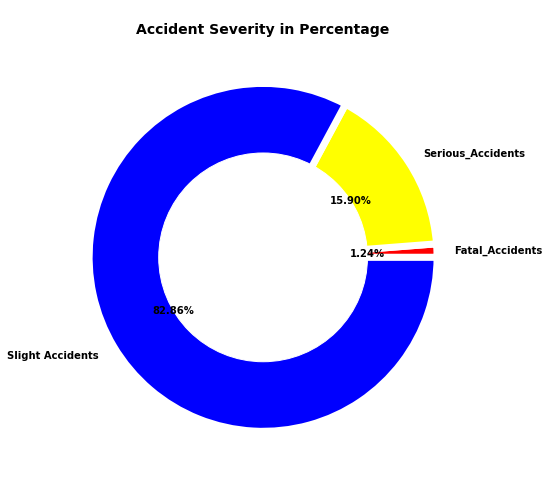

In [52]:
#plot accident severity in pie chart
plt.pie(x=level, labels=level_names, colors=['red', 'yellow', 'blue'], 
        autopct='%1.2f%%', pctdistance=0.6, textprops=dict(fontweight='bold'),
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
pie = plt.Circle((0,0), 0.6, color='white')

severity_pie = plt.gcf()
severity_pie.set_size_inches(8,8)
severity_pie.gca().add_artist(pie)
plt.title('\nAccident Severity in Percentage', fontsize=14, fontweight='bold')
plt.show()

##### 3.What is the age distribution of drivers involved in the accidents?

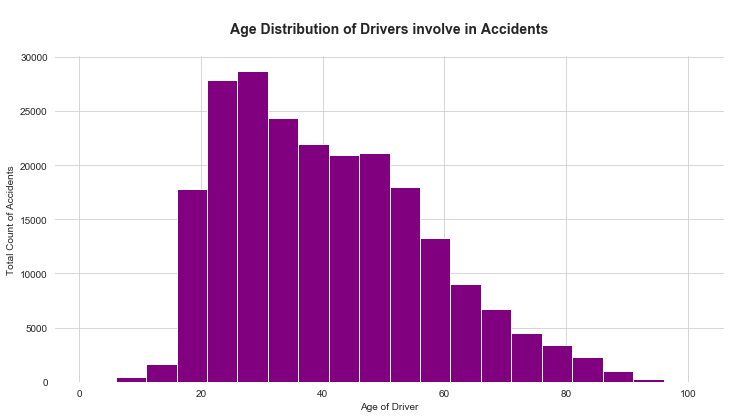

In [55]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,6))
Veh.Age_of_Driver.hist(bins=20, ax=ax, color='purple')
ax.set_title('\nAge Distribution of Drivers involve in Accidents\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Age of Driver', ylabel='Total Count of Accidents')

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

##### 4.Where do cyclists accidents usually happen?

In [56]:
cyclist_acc= cas[cas['Casualty_Type']== 1]
cyclist_acc.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
4,2016010000018,2,1,1,1,28,6,3,0,0,0,0,0,1,1,6
17,2016010000046,1,1,1,1,20,4,3,0,0,0,0,0,1,1,2
29,2016010000058,1,1,1,1,23,5,3,0,0,0,0,0,1,1,2
35,2016010000069,2,1,1,1,29,6,3,0,0,0,0,0,1,1,5
36,2016010000072,2,1,1,1,24,5,3,0,0,0,0,0,1,1,6


In [57]:
cyclist_acc= cyclist_acc[['Casualty_Type','Casualty_Home_Area_Type']]
cyclist_acc.head()

,Casualty_Type,Casualty_Home_Area_Type
4,1,1
17,1,1
29,1,1
35,1,1
36,1,1


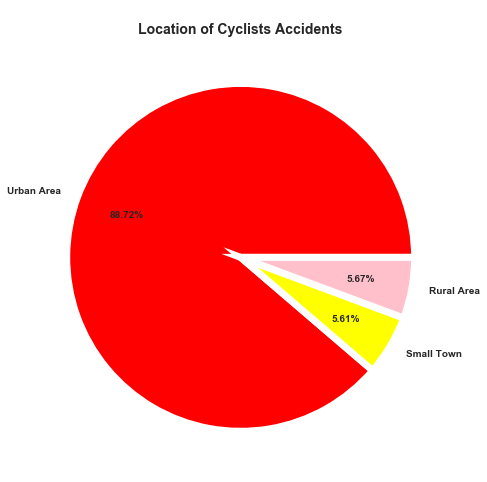

In [58]:
#assign the data
Urban_Area   = cyclist_acc.Casualty_Home_Area_Type.value_counts()[1]
Small_Town = cyclist_acc.Casualty_Home_Area_Type.value_counts()[2]
Rural_Area  = cyclist_acc.Casualty_Home_Area_Type.value_counts()[3]

location_names = ['Urban Area','Small Town', 'Rural Area']
location  = [Urban_Area,Small_Town, Rural_Area]
#explode = (0.2, 0, 0)

# create a pie chart
plt.pie(x=location, labels=location_names, colors=['red', 'Yellow', 'pink'], 
        autopct='%1.2f%%', pctdistance=0.7, textprops=dict(fontweight='bold'),
        wedgeprops={'linewidth':7, 'edgecolor':'white'})


fig = plt.gcf()
fig.set_size_inches(10,8)
plt.title('\nLocation of Cyclists Accidents', fontsize=14, fontweight='bold')
plt.show()

##### 5.What are the characteristics of casualties impacted in the accidents?

In [59]:
#assign the data
Driver   = cas.Casualty_Class.value_counts()[1]
Passenger = cas.Casualty_Class.value_counts()[2]
Pedestrian  = cas.Casualty_Class.value_counts()[3]

xtics_names = ['Driver','Passender', 'Pedestrian']
xtics = [Driver, Passenger, Pedestrian]

In [60]:
fig = px.bar(xtics,color=xtics_names,title='Characteristics of Casualties impacted in the Accidents',text=xtics)
fig.update_layout( yaxis_title='Accidents',xaxis_title='Casualty Class')
fig.show()

##### 6.Under which circumstances do accidents happen? Is there any correlation between these features?

In [61]:
circumstances = dftRoadSafety_Accidents.iloc[:, 24:29]
circumstances.head()

,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards
0,5,1,1,0,0
1,4,1,1,0,0
2,4,1,1,0,0
3,1,1,1,0,0
4,1,1,1,0,0


In [62]:
circumstances.corr()

,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards
Light_Conditions,1.000000,0.113298,0.171695,0.002734,0.044663
Weather_Conditions,0.113298,1.000000,0.141929,-0.006529,-0.012763
Road_Surface_Conditions,0.171695,0.141929,1.000000,0.065720,0.029326
Special_Conditions_at_Site,0.002734,-0.006529,0.065720,1.000000,0.027126
Carriageway_Hazards,0.044663,-0.012763,0.029326,0.027126,1.000000


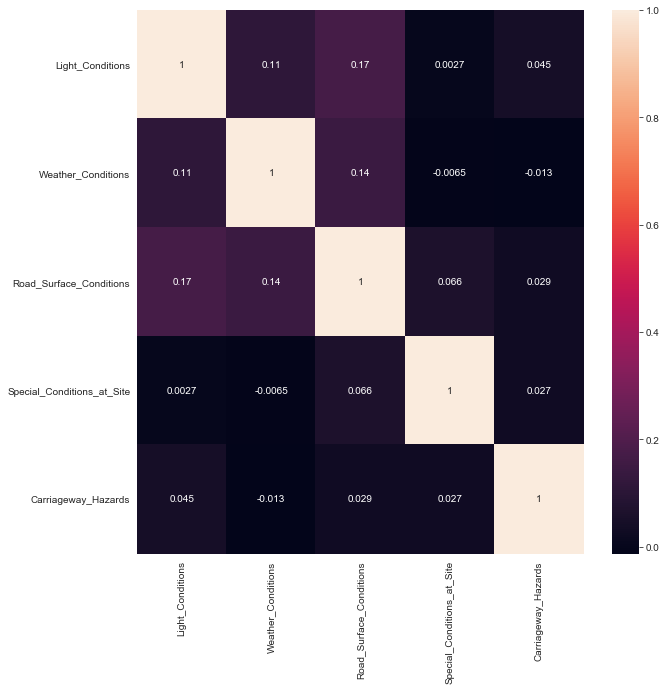

In [63]:
#check for correlation
plt.figure(figsize=(10,10))
sns.heatmap(circumstances.corr(),annot=True)